In [42]:
import nltk
from numpy import mean
import statistics
import numpy as np
import pickle as pkl
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import nltk

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten, Bidirectional
from tensorflow.keras.models import Sequential, load_model, model_from_config

In [5]:
X = pd.read_csv("train.csv")
features = pd.read_csv("data1.csv") 

In [6]:
X1_train = X.loc[:int(len(X.index)*0.8)]
y_train = X1_train[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]
X1_val = X.loc[int(len(X.index)*0.8)+1:int(len(X.index)*0.9)]
y_val = X1_val[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]
X1_test = X.loc[int(len(X.index)*0.9)+1:]
y_test = X1_test[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']] 


In [7]:
IP=14

y1_train=y_train["syntax"]
y2_train=y_train["cohesion"]
y3_train=y_train["vocabulary"]
y4_train=y_train["phraseology"]
y5_train=y_train["grammar"]
y6_train=y_train["conventions"]

y1_val=y_val["syntax"]
y2_val=y_val["cohesion"]
y3_val=y_val["vocabulary"]
y4_val=y_val["phraseology"]
y5_val=y_val["grammar"]
y6_val=y_val["conventions"]

y1_test=y_test["syntax"]
y2_test=y_test["cohesion"]
y3_test=y_test["vocabulary"]
y4_test=y_test["phraseology"]
y5_test=y_test["grammar"]
y6_test=y_test["conventions"]


y1_train = np.asarray(y1_train)
y1_val = np.asarray(y1_val)  

y2_train = np.asarray(y2_train)
y2_val = np.asarray(y2_val)  

y3_train = np.asarray(y3_train)
y3_val = np.asarray(y3_val)  

y4_train = np.asarray(y4_train)
y4_val = np.asarray(y4_val)  

y5_train = np.asarray(y5_train)
y5_val = np.asarray(y5_val)  

y6_train = np.asarray(y6_train)
y6_val = np.asarray(y6_val)  


In [8]:

features_array = np.asarray(features)
features_array_train = features_array[:3129]
features_array_val = features_array[3129:3129+391]
features_array_test = features_array[3129+391:]
print(features_array_test.shape)
print(features_array_val.shape)
print(features_array_train.shape)

(391, 300)
(391, 300)
(3129, 300)


In [37]:
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()
lr5 = LinearRegression()
lr6 = LinearRegression()

lr1.fit(features_array_train, y1_train)
lr2.fit(features_array_train, y2_train)
lr3.fit(features_array_train, y3_train)
lr4.fit(features_array_train, y4_train)
lr5.fit(features_array_train, y5_train)
lr6.fit(features_array_train, y6_train)


y1_pred = lr1.predict(features_array_test)
y2_pred = lr2.predict(features_array_test)
y3_pred = lr3.predict(features_array_test)
y4_pred = lr4.predict(features_array_test)
y5_pred = lr5.predict(features_array_test)
y6_pred = lr6.predict(features_array_test)

y1_pred = [round(r,1) for r in y1_pred]
y2_pred = [round(r,1) for r in y2_pred]
y3_pred = [round(r,1) for r in y3_pred]
y4_pred = [round(r,1) for r in y4_pred]
y5_pred = [round(r,1) for r in y5_pred]
y6_pred = [round(r,1) for r in y6_pred]


values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)


l=[(values1,values2,values3,values4,values5,values6)]
print(mean(l))

0.29942881500426255


In [15]:
lstm_embed_train = []
for i in range(0,len(features_array_train)):
    lstm_embed_train.append(np.asarray([features_array_train[i]]))
    

lstm_embed_test = []
for i in range(0,len(features_array_test)):
    lstm_embed_test.append(np.asarray([features_array_test[i]]))
     


lstm_embed_val = []
for i in range(0,len(features_array_val)):
    lstm_embed_val.append(np.asarray([features_array_val[i]]))
    

lstm_embed_test = np.asarray(lstm_embed_test)
lstm_embed_train = np.asarray(lstm_embed_train)
lstm_embed_val = np.asarray(lstm_embed_val)
print(lstm_embed_train.shape)
print(lstm_embed_val.shape)
print(lstm_embed_test.shape)

(3129, 1, 300)
(391, 1, 300)
(391, 1, 300)


In [61]:
def get_model_lstm():
    
    model = Sequential()
    model.add(LSTM(128, input_shape=[1,300], activation = 'relu',return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu'))
    model.summary()
    model.compile(loss='mean_squared_error', optimizer='rmsprop')

    return model

In [62]:
lstm1 = get_model_lstm();
lstm2 = get_model_lstm();
lstm3 = get_model_lstm();
lstm4 = get_model_lstm();
lstm5 = get_model_lstm();
lstm6 = get_model_lstm();

history1=lstm1.fit(lstm_embed_train, y1_train, epochs=100,validation_data=(lstm_embed_val,y1_val))
history2=lstm2.fit(lstm_embed_train, y2_train, epochs=100,validation_data=(lstm_embed_val,y2_val))
history3=lstm3.fit(lstm_embed_train, y3_train, epochs=100,validation_data=(lstm_embed_val,y3_val))
history4=lstm4.fit(lstm_embed_train, y4_train, epochs=100,validation_data=(lstm_embed_val,y4_val))
history5=lstm5.fit(lstm_embed_train, y5_train, epochs=100,validation_data=(lstm_embed_val,y5_val))
history6=lstm6.fit(lstm_embed_train, y6_train, epochs=100,validation_data=(lstm_embed_val,y6_val))

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 128)            219648    
                                                                 
 dropout_24 (Dropout)        (None, 1, 128)            0         
                                                                 
 dense_78 (Dense)            (None, 1, 32)             4128      
                                                                 
 dropout_25 (Dropout)        (None, 1, 32)             0         
                                                                 
 dense_79 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 223,809
Trainable params: 223,809
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_31"
________________________

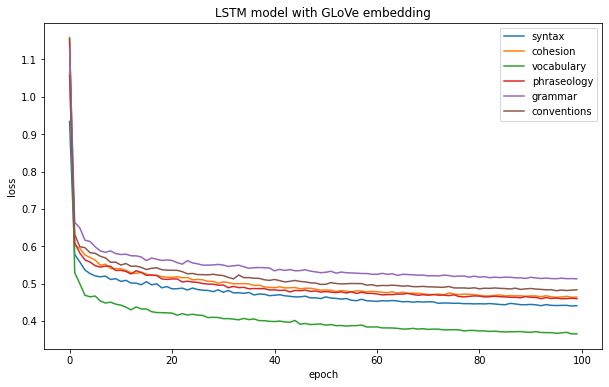

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])
plt.plot(history6.history['loss'])

plt.title('LSTM model with GLoVe embedding')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['syntax','cohesion','vocabulary','phraseology','grammar','conventions'])

In [38]:



y1_pred = lstm1.predict(lstm_embed_test).flatten()
y2_pred = lstm2.predict(lstm_embed_test).flatten()
y3_pred = lstm3.predict(lstm_embed_test).flatten()
y4_pred = lstm4.predict(lstm_embed_test).flatten()
y5_pred = lstm5.predict(lstm_embed_test).flatten()
y6_pred = lstm6.predict(lstm_embed_test).flatten()


y1_pred = [round(r,1) for r in y1_pred]
y2_pred = [round(r,1) for r in y2_pred]
y3_pred = [round(r,1) for r in y3_pred]
y4_pred = [round(r,1) for r in y4_pred]
y5_pred = [round(r,1) for r in y5_pred]
y6_pred = [round(r,1) for r in y6_pred]


values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)


print(values1,values2,values3,values4,values5,values6)
l=[(values1,values2,values3,values4,values5,values6)]
print(mean(l))

13/13 [==============================] - 0s 3ms/step
0.3874424309011077 0.4276214803271297 0.3331457950026255 0.4090281335777037 0.46746802225137757 0.4431713160834428
0.41131286302389786


In [39]:
rf1 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf2= RandomForestRegressor(n_estimators = 100, random_state = 42)
rf3 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf4 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf5 = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf6 = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf1.fit(features_array_train, y1_train)
rf2.fit(features_array_train, y2_train)
rf3.fit(features_array_train, y3_train)
rf4.fit(features_array_train, y4_train)
rf5.fit(features_array_train, y5_train)
rf6.fit(features_array_train, y6_train)



y1_pred = rf1.predict(features_array_test)
y2_pred = rf2.predict(features_array_test)
y3_pred = rf3.predict(features_array_test)
y4_pred = rf4.predict(features_array_test)
y5_pred = rf5.predict(features_array_test)
y6_pred = rf6.predict(features_array_test)

y1_pred = [round(r,1) for r in y1_pred]
y2_pred = [round(r,1) for r in y2_pred]
y3_pred = [round(r,1) for r in y3_pred]
y4_pred = [round(r,1) for r in y4_pred]
y5_pred = [round(r,1) for r in y5_pred]
y6_pred = [round(r,1) for r in y6_pred]


values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)


l=[(values1,values2,values3,values4,values5,values6)]
print(mean(l))

0.3092114236999148


In [28]:
clf1 = SVR(C=10.0, epsilon=0.01)
clf2 = SVR(C=10.0, epsilon=0.01)
clf3 = SVR(C=10.0, epsilon=0.01)
clf4 = SVR(C=10.0, epsilon=0.01)
clf5 = SVR(C=10.0, epsilon=0.01)
clf6 = SVR(C=10.0, epsilon=0.01)

clf1.fit(features_array_train, y1_train)
clf2.fit(features_array_train, y2_train)
clf3.fit(features_array_train, y3_train)
clf4.fit(features_array_train, y4_train)
clf5.fit(features_array_train, y5_train)
clf6.fit(features_array_train, y6_train)


y1_pred = clf1.predict(features_array_test)
y2_pred = clf2.predict(features_array_test)
y3_pred = clf3.predict(features_array_test)
y4_pred = clf4.predict(features_array_test)
y5_pred = clf5.predict(features_array_test)
y6_pred = clf6.predict(features_array_test)

In [40]:
y1_pred = [round(r,1) for r in y1_pred]
y2_pred = [round(r,1) for r in y2_pred]
y3_pred = [round(r,1) for r in y3_pred]
y4_pred = [round(r,1) for r in y4_pred]
y5_pred = [round(r,1) for r in y5_pred]
y6_pred = [round(r,1) for r in y6_pred]


values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)


l=[(values1,values2,values3,values4,values5,values6)]
print(mean(l))

0.3092114236999148


In [55]:
def get_model_nn():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, input_dim=300, activation='tanh'))
#     model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(4, activation='relu'))
#     model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    print(model.summary())
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [56]:
embedding_model1 = get_model_nn()
embedding_model2 = get_model_nn()
embedding_model3 = get_model_nn()
embedding_model4= get_model_nn()
embedding_model5 = get_model_nn()
embedding_model6 = get_model_nn()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                19264     
                                                                 
 dense_61 (Dense)            (None, 4)                 260       
                                                                 
 dense_62 (Dense)            (None, 1)                 5         
                                                                 
Total params: 19,529
Trainable params: 19,529
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                19264     
                                                                 
 dense_64 (Dense)    

In [59]:
history11=embedding_model1.fit(features_array_train, y1_train, epochs=100,validation_data=(features_array_val,y1_val))
history22=embedding_model2.fit(features_array_train, y2_train, epochs=100,validation_data=(features_array_val,y2_val))
history33=embedding_model3.fit(features_array_train, y3_train, epochs=100,validation_data=(features_array_val,y3_val))
history44=embedding_model4.fit(features_array_train, y4_train, epochs=100,validation_data=(features_array_val,y4_val))
history55=embedding_model5.fit(features_array_train, y5_train, epochs=100,validation_data=(features_array_val,y5_val))
history66=embedding_model6.fit(features_array_train, y6_train, epochs=100,validation_data=(features_array_val,y6_val))

Epoch 1/100
98/98 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.0029 - val_loss: 0.3231 - val_accuracy: 0.0026
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.0029 - val_loss: 0.2939 - val_accuracy: 0.0026
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.0029 - val_loss: 0.2965 - val_accuracy: 0.0026
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.0029 - val_loss: 0.3340 - val_accuracy: 0.0026
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.0029 - val_loss: 0.2918 - val_accuracy: 0.0026
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.0029 - val_loss: 0.3218 - val_accuracy: 0.0026
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.0029 - val_loss: 0.2917 - val_accuracy: 0.0026
Epoch 8/100
9

13/13 [==============================] - 0s 2ms/step
0.3254688802176064


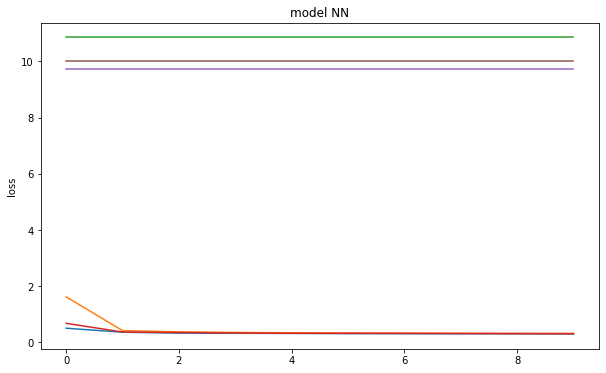

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

plt.plot(history11.history['loss'])
plt.plot(history22.history['loss'])
plt.plot(history33.history['loss'])
plt.plot(history44.history['loss'])
plt.plot(history55.history['loss'])
plt.plot(history66.history['loss'])

plt.title('model NN')
plt.ylabel('loss')



y1_pred = embedding_model1.predict(features_array_test).flatten()
y2_pred = embedding_model1.predict(features_array_test).flatten()
y3_pred = embedding_model1.predict(features_array_test).flatten()
y4_pred = embedding_model1.predict(features_array_test).flatten()
y5_pred = embedding_model1.predict(features_array_test).flatten()
y6_pred = embedding_model1.predict(features_array_test).flatten()



y1_pred = [round(r,1) for r in y1_pred]
y2_pred = [round(r,1) for r in y2_pred]
y3_pred = [round(r,1) for r in y3_pred]
y4_pred = [round(r,1) for r in y4_pred]
y5_pred = [round(r,1) for r in y5_pred]
y6_pred = [round(r,1) for r in y6_pred]


values1 = mean_squared_error(y1_pred, y1_test)
values2 = mean_squared_error(y2_pred, y2_test)
values3 = mean_squared_error(y3_pred, y3_test)
values4 = mean_squared_error(y4_pred, y4_test)
values5 = mean_squared_error(y5_pred, y5_test)
values6 = mean_squared_error(y6_pred, y6_test)


l=[(values1,values2,values3,values4,values5,values6)]
print(mean(l))

,text_id,syntax,cohesion,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.2,3.0,2.7,2.9
1,000BAD50D026,2.9,3.0,3.1,3.0,2.9,3.0
2,00367BB2546B,3.1,3.1,3.2,3.1,3.0,3.1
